# PbS 900 su TEMPERATURA: FIT VARSHNI

## Importazioni

In [1]:
from qp2_subroutines import *
import os
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

In [2]:
from extracted_data.PbS_rampa_T_peaks import PbS_T_peaks

In [3]:
arr_T = ['90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
        '190', '200', '210', '220', '240', '250', '265', '300'] # + 'K'

## PLOT DI PICCHI, FWHM E INTENSITÀ

In [4]:
int_T = [int(x) for x in arr_T]
x = np.array(int_T)
mu1 = []
mu2 = []
a1 = []
a2 = []
sigma1 = []
sigma2 = []

In [5]:
# Assemblo i vettori per il plot
for T in arr_T:
    if PbS_T_peaks[T][0][1] > PbS_T_peaks[T][1][1]:
        mu1.append(PbS_T_peaks[T][0][1])
        mu2.append(PbS_T_peaks[T][1][1])
        a1.append(PbS_T_peaks[T][0][0])
        a2.append(PbS_T_peaks[T][1][0])
        sigma1.append(PbS_T_peaks[T][0][2])
        sigma2.append(PbS_T_peaks[T][1][2])
    else: 
        mu1.append(PbS_T_peaks[T][1][1])
        mu2.append(PbS_T_peaks[T][0][1])
        a1.append(PbS_T_peaks[T][1][0])
        a2.append(PbS_T_peaks[T][0][0])
        sigma1.append(PbS_T_peaks[T][1][2])
        sigma2.append(PbS_T_peaks[T][0][2])

## $\mu$ su T + Varshni

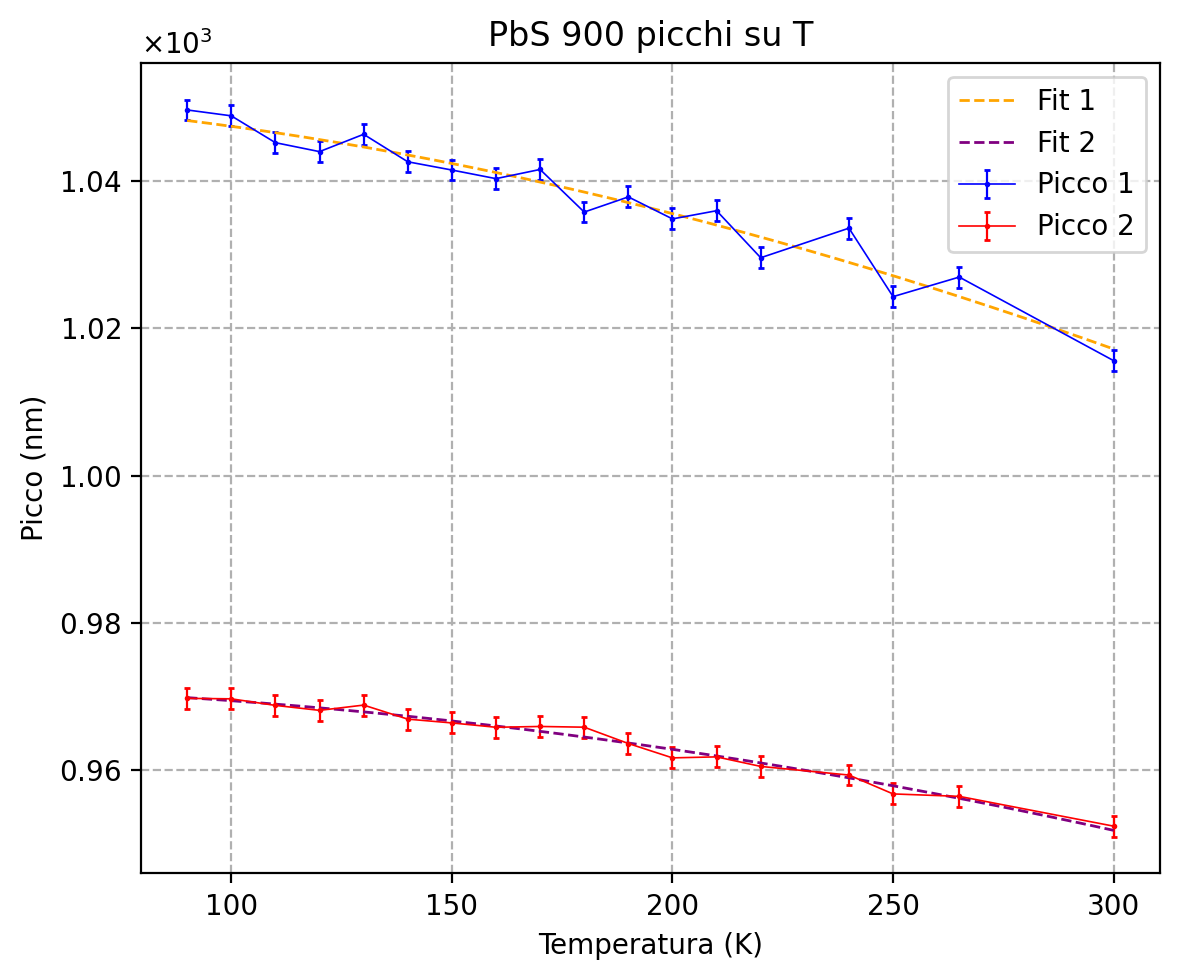

• Varshni 1
 - $E_0$ = 1051.5971192620636
 - $\alpha$ = 0.8028456676047427
 - $\beta$ = 1798.190696991558
 - chi2rid = 2.534209978678386
• Varshni 2
 - $E_0$ = 971.6548622934262
 - $\alpha$ = -16416.786776157907
 - $\beta$ = -74666615.59206322
 - chi2rid = 0.22900637058302348


In [6]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)
# serve errorbar 
err_mu = 1.4145357031249999

plt.errorbar(x, mu1, yerr=err_mu, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, mu2, yerr=err_mu, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## VARSHNI ##
p0 = [0.1, 0.1, 0.1]
low = [-np.inf, -np.inf, -np.inf]
upp = [np.inf, np.inf, np.inf]
popt1, pcov1 = curve_fit(varshni, x, mu1, sigma=err_mu, p0=p0, bounds=(low,upp))
popt2, pcov2 = curve_fit(varshni, x, mu2, sigma=err_mu, p0=p0, bounds=(low,upp))

## PLOT CURVA FIT ##
x_plot = np.linspace(90, 300, 150)
y_plot1 = varshni(x_plot, *popt1)
plt.plot(x_plot, y_plot1, linestyle='--', color='orange', label=f"Fit 1", linewidth=1)#, zorder=2)
y_plot2 = varshni(x_plot, *popt2)
plt.plot(x_plot, y_plot2, linestyle='--', color='purple', label=f"Fit 2", linewidth=1)#, zorder=2)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 picchi su T')
plt.xlabel("Temperatura (K)")
plt.ylabel("Picco (nm)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

## CHI2 ##
chi2_1, dof_1 = chi2_varshni (x, mu1, err_y=err_mu, popt=popt1)
chi2_2, dof_2 = chi2_varshni (x, mu2, err_y=err_mu, popt=popt2)

## PRINT RISULTATI FIT ##
print('• Varshni 1')
print(r' - $E_0$ =', popt1[0])
print(r' - $\alpha$ =', popt1[1])
print(r' - $\beta$ =', popt1[2])
print(' - chi2rid =', chi2_1/dof_1)
print('• Varshni 2')
print(r' - $E_0$ =', popt2[0])
print(r' - $\alpha$ =', popt2[1])
print(r' - $\beta$ =', popt2[2])
print(' - chi2rid =', chi2_2/dof_2)

## FWHM su T

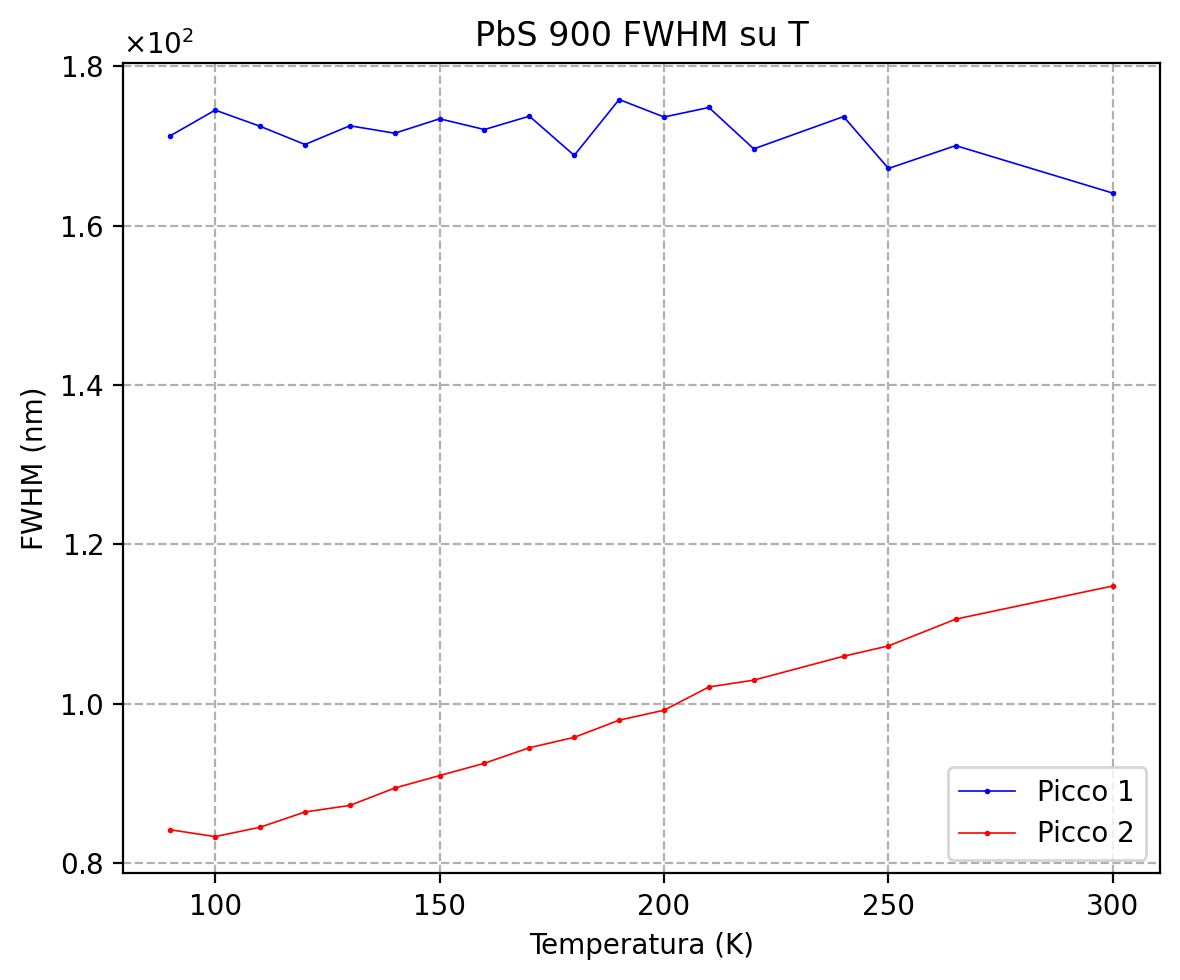

In [7]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)
# serve errorbar 
err_mu = 1.4145357031249999

fwhm1 = 2.633 * np.array(sigma1)
fwhm2 = 2.633 * np.array(sigma2)

plt.errorbar(x, fwhm1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, fwhm2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 FWHM su T')
plt.xlabel("Temperatura (K)")
plt.ylabel("FWHM (nm)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

## Intensità integrata su T

height ∗ sigma ∗ 2 π

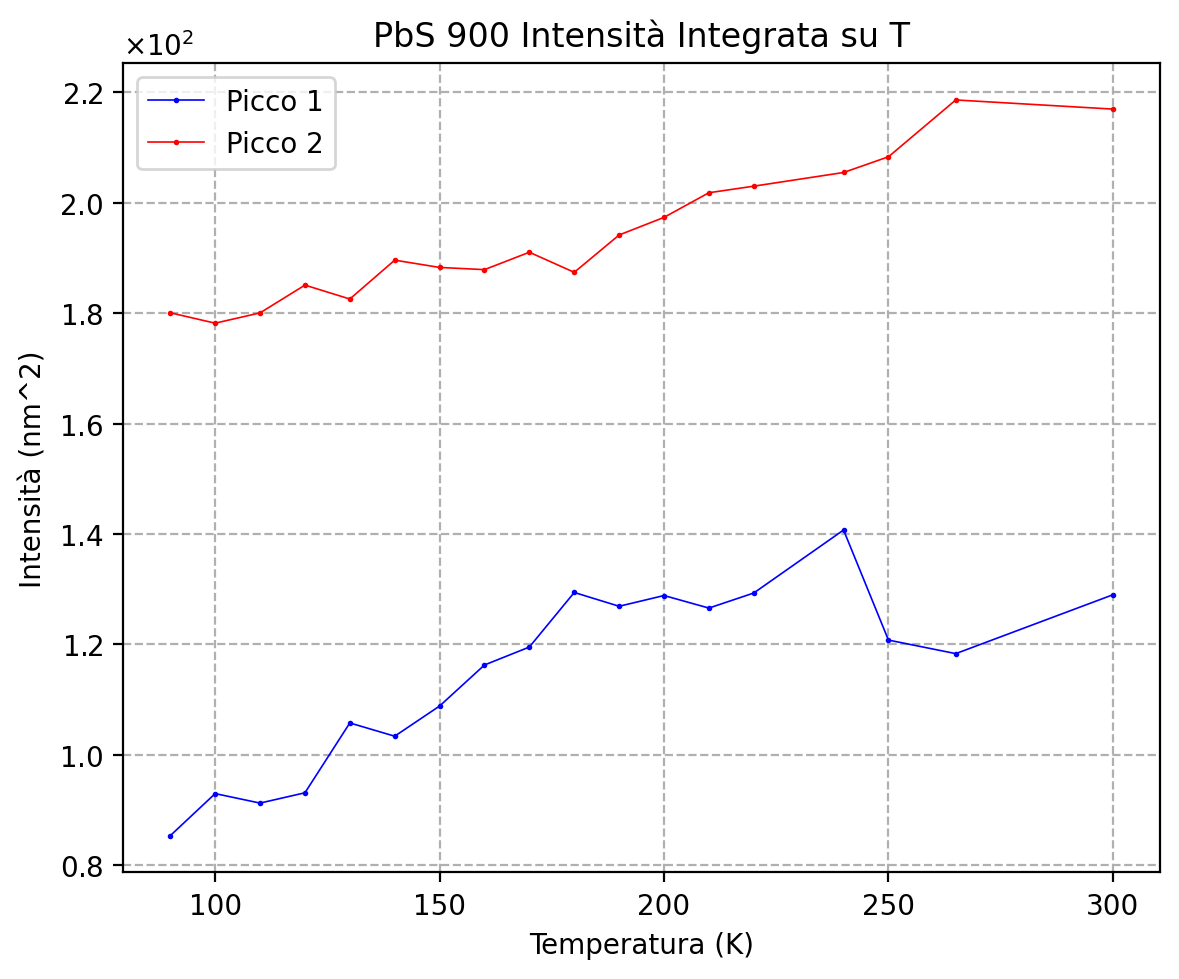

In [8]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)

intensità1 = np.array(a1) * np.array(sigma1) * 2 * np.pi
intensità2 = np.array(a2) * np.array(sigma2) * 2 * np.pi

plt.errorbar(x, intensità1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, intensità2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 Intensità Integrata su T')
plt.xlabel("Temperatura (K)")
plt.ylabel("Intensità (nm^2)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()